In [6]:
# here, we import all the libraries we need for the analysis
# we will use the scanpy library to vizualize the umap and the clustering
# umap is a dimensionality reduction technique that is used to visualize the data in 2D
# we will also use the seaborn library to plot the violin plots

import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns

In [7]:
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/outs/240701_kinker_anndata.h5ad')

In [3]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [4]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

/tmp/ipykernel_997166/2934595701.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=random_state)


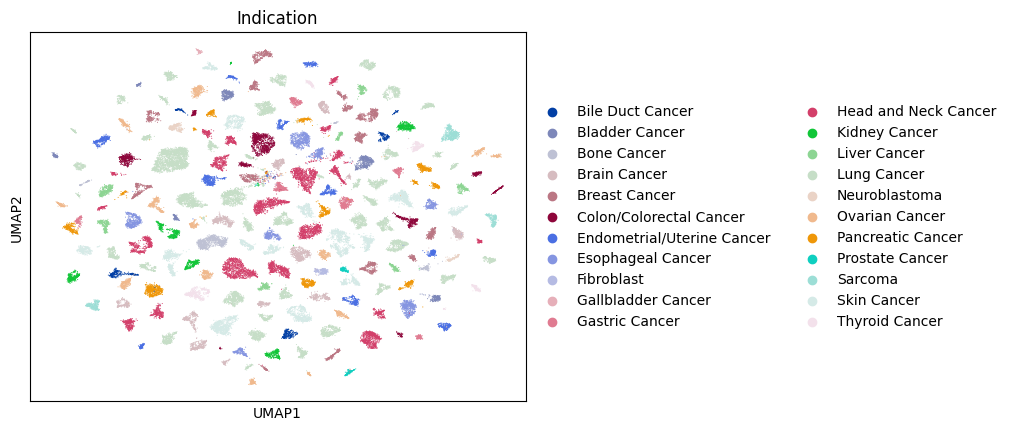

In [5]:
sc.pl.umap(adata, color=['Indication'])